<a href="https://colab.research.google.com/github/Rafael-Souz/CIENCIA_DE_DADOS/blob/main/Regressao_Linear_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

<center>

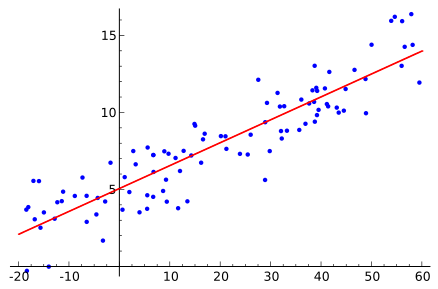

</center>

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots \theta_n x_n$$

$\hat{y}$ - valor previsto

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model # Regressão Linear

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Criação do conjunto de dados

df = pd.DataFrame()

# Definir as horas de estudo
df['x'] = [5.1, 5.5, 5.9, 6.5, 6.8, 7.6, 8.3, 8.5, 9.1, 9.5]

# Definir as notas obtidas
df['y'] = [2.0, 2.9, 4.0, 5.9, 6.0, 6.9, 8.0, 9.0, 9.9, 10.0]

# Verificar o DataFrame
df.head(10)

,x,y
0,5.1,2.0
1,5.5,2.9
2,5.9,4.0
3,6.5,5.9
4,6.8,6.0
5,7.6,6.9
6,8.3,8.0
7,8.5,9.0
8,9.1,9.9
9,9.5,10.0


In [ ]:
# Analisar os dados estatísticos do DataFrame
df.describe()

,x,y
count,10.000000,10.000000
mean,7.280000,6.460000
std,1.546897,2.838701
min,5.100000,2.000000
25%,6.050000,4.475000
50%,7.200000,6.450000
75%,8.450000,8.750000
max,9.500000,10.000000


In [ ]:
# Separando os dados em duas partes (Variáveis dependentes e independentes)
x_values = df[['x']]
y_values = df[['y']]

# Modelo de Regressão Linear Simples

P: O que queremos?

R: Qual o número de horas necessárias para que um aluno obtenha um nota boa?


In [ ]:
# Treinando o modelo de Regressão Linear
modelo = linear_model.LinearRegression()
modelo.fit(x_values, y_values)

LinearRegression()

In [ ]:
# Coeficiente da reta gerada
# y = ax + b (equação da reta)

# Coeficiente da inclinação da reta -> linha de tendência (a)
print('Coeficiente angular:', round(modelo.coef_[0][0], 2))

# Ponto onde a linha de tendência atinge o eixo 'y' (b)
print('Coeficiente linear:', round(modelo.intercept_[0], 2))

Coeficiente angular: 1.81
Coeficiente linear: -6.74


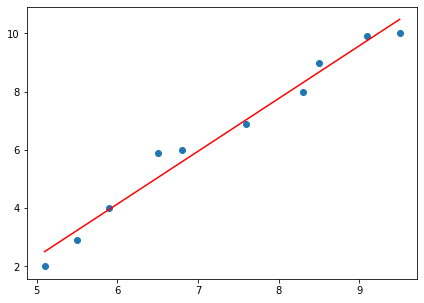

In [ ]:
# Plotar um gráfico dos nossos dados
plt.figure(1, figsize=(7,5))
plt.scatter(df.x, df.y)

# Desenhar o .fit()
fit = np.polyfit(df.x.values, df.y.values, 1)
fit_fn = np.poly1d(fit)

# Plotando a linha da regressão no gráfico
plt.plot(df.x.values, fit_fn(df.x.values), 'r')
plt.show()

In [ ]:
# Estimar um valor desconhecido, ou seja, informar um valor de horas para obter a nota
# Limite para a predição é entre 5.1 e 9.5
horas_estudadas = 5.1
predicao = modelo.predict(np.array([[horas_estudadas]]))
print('Nota Prevista:', round(predicao[0][0],2))

Nota Prevista: 2.51


In [ ]:
# Atividade "rapidão"
# Reproduzir os códigos anteriores, utilizando os dados a seguir:

dados = pd.read_csv("https://www.edsonmelo.com.br/dados_csv/dados_regressao.csv", sep=',', header=None)

In [ ]:
# Resolvendo a atividade
df = pd.DataFrame()
df['x'] = dados.values[:, 0]
df['y'] = dados.values[:, -1]

# Criando dois DataFrames separados (values)
x_values = df[['x']] # variável independente (entrada)
y_values = df[['y']] # variável dependente (saída)

# Definição e treinamento do modelo de Regressão Linear
modelo = linear_model.LinearRegression()
modelo.fit(x_values, y_values)

print('(a):', modelo.coef_)
print('(b):', modelo.intercept_)

(a): [[0.06401229]]
(b): [0.74949629]


In [ ]:
# Predição sobre o modelo
modelo.predict(np.array([[2.07]]))

array([[0.88200173]])

# Regressão Linear Múltipla

É quando o número de variáveis independentes é maio que um, ou seja, `var_dep` > 1.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [ ]:
df = pd.read_csv('https://www.edsonmelo.com.br/dados_csv/dados_midias.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seq     200 non-null    int64  
 1   tv      200 non-null    float64
 2   radio   200 non-null    float64
 3   jornal  200 non-null    float64
 4   vendas  200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.head()

,seq,tv,radio,jornal,vendas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,seq,tv,radio,jornal,vendas
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Apagando as colunas que não interessam
df.drop(['seq'], axis=1)

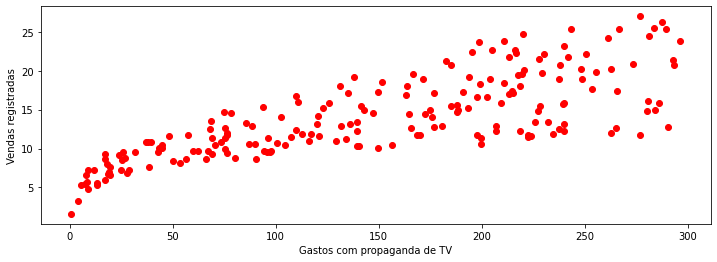

In [ ]:
# Vamos analisar graficamente as colunas
plt.figure(figsize=(12,4))
plt.scatter(
    df.tv,
    df.vendas,
    c='red'
)
plt.xlabel('Gastos com propaganda de TV')
plt.ylabel('Vendas registradas')
plt.show()

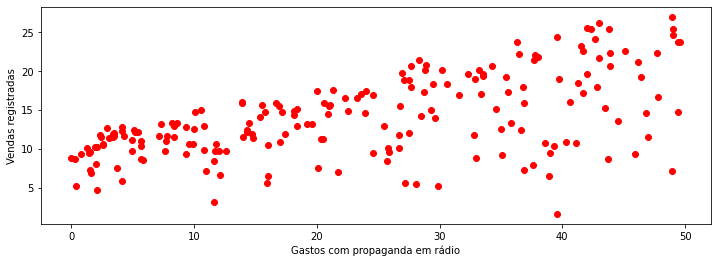

In [ ]:
# Vamos analisar graficamente as colunas
plt.figure(figsize=(12,4))
plt.scatter(
    df.radio,
    df.vendas,
    c='red'
)
plt.xlabel('Gastos com propaganda em rádio')
plt.ylabel('Vendas registradas')
plt.show()

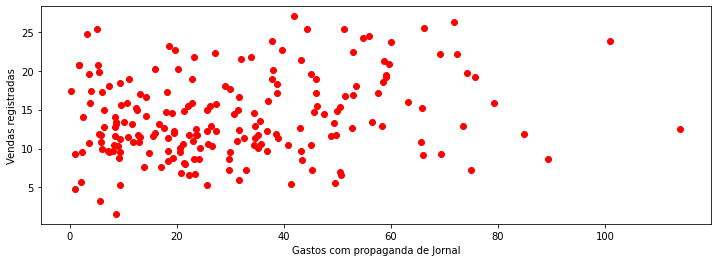

In [ ]:
# Vamos analisar graficamente as colunas
plt.figure(figsize=(12,4))
plt.scatter(
    df.jornal,
    df.vendas,
    c='red'
)
plt.xlabel('Gastos com propaganda de Jornal')
plt.ylabel('Vendas registradas')
plt.show()

In [ ]:
# Aplicar a regressão e plotar um gráfico para analisar os resultados
X = df.jornal.values.reshape(-1,1)
y = df.vendas.values.reshape(-1,1)

modelo = LinearRegression()
modelo.fit(X, y)

# Vamos testar todos os valores para a variável independente TV
previsoes = modelo.predict(X)

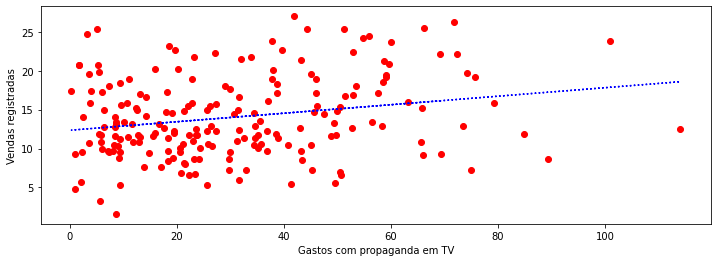

In [ ]:
# Plotando o gráfico da regressão para a variável TV
plt.figure(figsize=(12,4))
plt.scatter(
    df.jornal,
    df.vendas,
    c='red'
)

# Linha da regressão
plt.plot(
    df.jornal,
    previsoes,
    c='blue',
    linestyle=':'
)

plt.xlabel('Gastos com propaganda em TV')
plt.ylabel('Vendas registradas')
plt.show()

In [ ]:
# Realizem a plotagem para as três variáveis e analise os resultados

In [ ]:
# Analisar a correlação entre as variáveis
df.corr()

,seq,tv,radio,jornal,vendas
seq,1.000000,0.017715,-0.110680,-0.154944,-0.051616
tv,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
jornal,-0.154944,0.056648,0.354104,1.000000,0.228299
vendas,-0.051616,0.782224,0.576223,0.228299,1.000000


In [ ]:
# Avaliando o modelo de regressão
